In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from setup import setup
LOFAR_DIR, OUTPUT_DIR, RUNS_DIR = setup()

In [2]:
model = keras.models.load_model('/home/lucas_nunes/Documentos/sonar_output/lofar_parameters_1024_fft_pts_5_decimation/mlp_intermediate_neurons20/kfold_novelty_class_C/fold_1/best_model/model', compile=False)
train_set = joblib.load('/home/lucas_nunes/Documentos/sonar_output/lofar_parameters_1024_fft_pts_5_decimation/mlp_intermediate_neurons20/kfold_novelty_class_C/fold_1/train_set.joblib')
test_set = joblib.load('/home/lucas_nunes/Documentos/sonar_output/lofar_parameters_1024_fft_pts_5_decimation/mlp_intermediate_neurons20/kfold_novelty_class_C/fold_1/val_set.joblib')

In [3]:
from data_analysis.neural_networks.metrics import sparse_accuracy
model.compile(optimizer='adam', loss=keras.losses.mean_squared_error, metrics=[sparse_accuracy])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                8020      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_train = model.predict(train_set)
y_train = np.argmax(train_set.y_set, axis=1)
x_test = model.predict(test_set)
y_test = np.argmax(test_set.y_set, axis=1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7918, 3) (7918,) (2640, 3) (2640,)


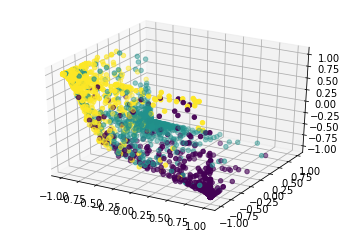

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x_test.T[0], ys=x_test.T[1], zs=x_test.T[2], c=y_test)
plt.show()

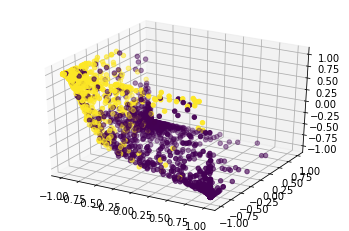

In [6]:
#SVM for class B
y_train = np.where(y_train == 2, 1, -1)
y_test = np.where(y_test == 2, 1, -1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x_test.T[0], ys=x_test.T[1], zs=x_test.T[2], c=y_test)
plt.show()

In [7]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
predictions = svm_model.predict(x_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1581  108]
 [  81  870]]
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1689
           1       0.89      0.91      0.90       951

    accuracy                           0.93      2640
   macro avg       0.92      0.93      0.92      2640
weighted avg       0.93      0.93      0.93      2640



In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.966, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.965, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] ................ C=0.1, kernel=linear, score=0.963, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.972, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.962, tot

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [11]:
grid.best_params_

{'C': 100, 'kernel': 'linear'}

In [12]:
x_train = 10*x_train
x_test = 10*x_test

In [13]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly', degree=5)
svm_model.fit(x_train, y_train)
predictions = svm_model.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1597   92]
 [  90  861]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1689
           1       0.90      0.91      0.90       951

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



In [15]:
class Sequence():

    def __init__(self, data):
        self.data=data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index]

In [16]:
x_train_seq, y_train_seq, x_test_seq, y_test_seq = Sequence(x_train), Sequence(y_train), Sequence(x_test), Sequence(y_test)

In [17]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_seq, y_train_seq)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predictions = svm_model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1581  108]
 [  81  870]]
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1689
           1       0.89      0.91      0.90       951

    accuracy                           0.93      2640
   macro avg       0.92      0.93      0.92      2640
weighted avg       0.93      0.93      0.93      2640

